### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* 1 min

In [2]:
dt_signal_1 = np.load('workspace/data/k_ecg_signal_1.npy') # 1 min ppg

In [3]:
lb_list = np.load('workspace/data/k_ecg_lb.npy')

In [4]:
data = list(dt_signal_1)

In [5]:
df = pd.DataFrame(data)

In [6]:
label = list(lb_list)

In [7]:
df['label'] = label

In [8]:
df 
# label : -1 down, 0 norm , 1 up 
# 0 norm
# -1, 1, abnorm

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,-1.638400,-1.697650,-1.727280,-1.806270,-1.648280,-0.927435,-1.282920,-1.796400,-1.984010,-2.043260,...,-3.554070,-3.573820,-3.593570,-3.623190,-3.662690,-3.662690,-3.672570,-3.672570,-3.692320,-1.0
1,-0.028849,-0.028849,-0.028849,-0.038724,-0.018975,0.010649,0.050147,0.079771,0.089645,0.099520,...,0.099520,0.069896,0.050147,0.050147,0.030398,0.010649,0.000774,0.000774,-0.009100,-1.0
2,0.089645,0.089645,0.069896,0.050147,0.050147,0.040273,0.020523,0.020523,0.000774,0.000774,...,0.129144,0.178517,0.158767,0.168642,0.148893,0.188391,0.198266,0.119269,0.139018,-1.0
3,0.040273,0.050147,0.050147,0.069896,0.129144,0.129144,0.129144,0.069896,0.030398,0.010649,...,0.020523,0.020523,0.010649,0.010649,-0.018975,0.218015,0.978357,0.612998,0.148893,-1.0
4,0.050147,0.079771,0.109395,0.099520,0.079771,0.020523,-0.018975,-0.028849,-0.018975,-0.038724,...,0.050147,0.000774,-0.018975,-0.018975,-0.009100,-0.048599,0.464879,1.086980,0.632747,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,0.050147,0.060022,0.089645,0.109395,0.148893,0.178517,0.208140,0.208140,0.168642,0.060022,...,0.030398,0.040273,0.050147,0.069896,0.089645,0.119269,0.148893,0.178517,0.208140,0.0
678,0.020523,0.020523,0.030398,0.030398,0.040273,0.050147,0.069896,0.079771,0.109395,0.129144,...,0.040273,0.040273,0.040273,0.040273,0.040273,0.050147,0.060022,0.069896,0.069896,0.0
679,0.129144,0.158767,0.218015,0.277262,0.336510,0.356259,0.326635,0.247639,0.129144,0.030398,...,-0.038724,-0.028849,0.148893,0.188391,-0.591700,-0.226341,0.020523,0.020523,0.030398,-1.0
680,-0.650947,-0.295463,-0.157219,-0.068348,-0.117721,-0.265839,-0.088097,-0.088097,-0.117721,0.060022,...,0.000774,0.010649,0.040273,0.060022,0.089645,0.139018,0.208140,0.287137,0.376008,-1.0


In [9]:
df['label'].value_counts()

 0.0    589
-1.0     88
 1.0      5
Name: label, dtype: int64

* bandpass filter

In [10]:
from scipy.signal import butter
from scipy.signal import lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs # 50, fs:100 
    low = lowcut / nyq # 0.5/50 = 1/100, lowcut: 0.5
    high = highcut / nyq # 15/50 = 30/100, highcut : 15
    # order : frequency cut wave
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# BPF setting 0.5 ~ 15 hz
lowcut = 0.5
highcut = 15

* ex

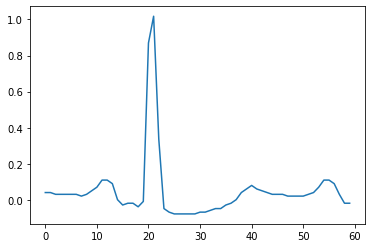

In [11]:
plt.plot(df[df['label'] == 0].iloc[0][:-1])

In [12]:
yy = butter_bandpass_filter(df[df['label'] == 0].iloc[0][:-1], lowcut, highcut, 100, order=5)

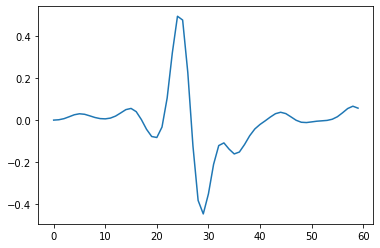

In [13]:
plt.plot(yy)

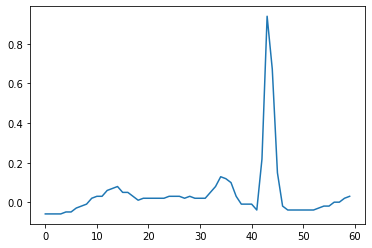

In [14]:
plt.plot(df[df['label'] == 0].iloc[1][:-1])

In [15]:
yy = butter_bandpass_filter(df[df['label'] == 0].iloc[1][:-1], lowcut, highcut, 100, order=5)

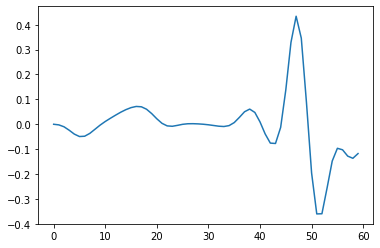

In [16]:
plt.plot(yy)

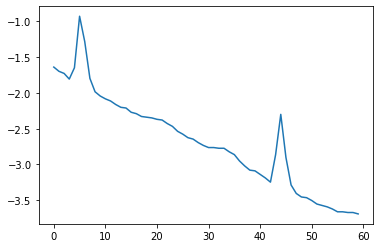

In [17]:
plt.plot(df[df['label'] == -1].iloc[0][:-1])

In [18]:
yy = butter_bandpass_filter(df[df['label'] == -1].iloc[0][:-1], lowcut, highcut, 100, order=5)

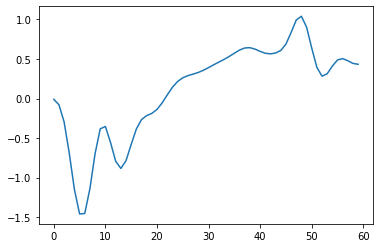

In [19]:
plt.plot(yy)

* filtering

In [20]:
dt_signal_1_bp = []
for i in dt_signal_1:
    yy = butter_bandpass_filter(i, lowcut, highcut, 100, order=5)
    dt_signal_1_bp.append(yy)

In [21]:
dt_signal_1

array([[-1.63839996e+00, -1.69764996e+00, -1.72728002e+00, ...,
        -3.67256999e+00, -3.67256999e+00, -3.69232011e+00],
       [-2.88494006e-02, -2.88494006e-02, -2.88494006e-02, ...,
         7.74296990e-04,  7.74296990e-04, -9.10027046e-03],
       [ 8.96454006e-02,  8.96454006e-02,  6.98963031e-02, ...,
         1.98266000e-01,  1.19268999e-01,  1.39017999e-01],
       ...,
       [ 1.29143998e-01,  1.58767000e-01,  2.18015000e-01, ...,
         2.05233991e-02,  2.05233991e-02,  3.03980000e-02],
       [-6.50946975e-01, -2.95462996e-01, -1.57218993e-01, ...,
         2.08140001e-01,  2.87137002e-01,  3.76008004e-01],
       [ 1.68641999e-01,  2.27889001e-01,  2.87137002e-01, ...,
         6.00216985e-02,  6.98963031e-02,  7.97709003e-02]])

In [22]:
dt_signal_1_bp

[array([-0.00989493, -0.0791516 , -0.29549267, -0.69157767, -1.15110821,
        -1.45915477, -1.45433138, -1.14055096, -0.69825513, -0.38354219,
        -0.35347064, -0.55635394, -0.79326746, -0.88438939, -0.78607584,
        -0.58114187, -0.38603663, -0.26663518, -0.21632776, -0.18782836,
        -0.13841997, -0.05541374,  0.04628278,  0.14228188,  0.21547332,
         0.26227287,  0.28962916,  0.30867831,  0.32935329,  0.35697891,
         0.39097571,  0.42682838,  0.46101947,  0.49467754,  0.53174339,
         0.57308406,  0.61250552,  0.63889825,  0.64316444,  0.62516552,
         0.59595988,  0.57224317,  0.56518598,  0.57535841,  0.6074075 ,
         0.68771524,  0.83454078,  0.99260508,  1.04052748,  0.90314227,
         0.63851954,  0.39337032,  0.28240009,  0.31368485,  0.41077256,
         0.48758155,  0.50509163,  0.47766384,  0.44391959,  0.43345489]),
 array([-1.74232656e-04, -1.38742240e-03, -5.14979201e-03, -1.20174030e-02,
        -2.00489936e-02, -2.53609257e-02, -2.3

### Autoencoder

In [23]:
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd

import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [24]:
data = list(dt_signal_1_bp)

In [25]:
label = list(lb_list)

In [26]:
df = pd.DataFrame(data)

In [27]:
df['label'] = label

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,-0.009895,-0.079152,-0.295493,-0.691578,-1.151108,-1.459155,-1.454331,-1.140551,-0.698255,-0.383542,...,0.393370,0.282400,0.313685,0.410773,0.487582,0.505092,0.477664,0.443920,0.433455,-1.0
1,-0.000174,-0.001387,-0.005150,-0.012017,-0.020049,-0.025361,-0.023755,-0.012039,0.010344,0.039544,...,-0.038381,0.006486,0.028055,0.024772,0.005051,-0.018967,-0.037931,-0.049047,-0.054586,-1.0
2,0.000541,0.004311,0.015883,0.036088,0.056719,0.065065,0.054959,0.031671,0.006449,-0.012069,...,-0.028749,-0.004864,0.026596,0.059168,0.084323,0.094916,0.090245,0.077379,0.064592,-1.0
3,0.000243,0.001996,0.007664,0.018574,0.032892,0.047633,0.061916,0.075294,0.083040,0.076265,...,0.098269,0.063957,0.020527,-0.016645,-0.037013,-0.039118,-0.020034,0.043615,0.178607,-1.0
4,0.000303,0.002591,0.010555,0.027439,0.051204,0.072412,0.078103,0.059691,0.019881,-0.026711,...,0.041979,0.047238,0.040141,0.019663,-0.009592,-0.037496,-0.051121,-0.029049,0.065842,-1.0


In [29]:
df['label'] = df['label'].map(lambda x : True if x == 0 else False)

* Remove NaN

In [30]:
df_drop = df.dropna()

* Train

In [31]:
df_norm = df_drop[df_drop['label']==True]

* Only Test

In [32]:
df_ano = df_drop[df_drop['label']!=True]

In [33]:
df_norm

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
6,0.000243,0.001937,0.007129,0.016218,0.025728,0.030425,0.027950,0.020584,0.012699,0.007460,...,-0.005028,-0.003156,-0.001145,0.004335,0.016333,0.035121,0.055462,0.066504,0.057196,True
7,-0.000353,-0.002812,-0.010438,-0.024236,-0.039856,-0.049643,-0.048486,-0.037159,-0.020590,-0.003824,...,-0.360776,-0.360129,-0.256344,-0.148060,-0.096972,-0.102992,-0.128379,-0.137155,-0.118198,True
8,-0.000115,-0.001211,-0.005821,-0.017272,-0.036070,-0.055500,-0.053995,0.010882,0.169293,0.364399,...,0.049197,0.231764,0.386129,0.378424,0.174027,-0.111263,-0.311118,-0.341337,-0.240155,True
9,-0.000353,-0.002812,-0.010378,-0.023821,-0.038628,-0.047787,-0.047720,-0.040598,-0.031644,-0.024239,...,-0.058007,-0.027797,0.018737,0.063026,0.076683,0.041581,-0.031935,-0.108281,-0.143980,True
10,-0.000353,-0.002752,-0.009486,-0.014798,0.010459,0.108901,0.272552,0.395522,0.350418,0.126389,...,-0.273925,-0.131192,-0.034653,-0.012085,-0.031356,-0.043018,-0.019349,0.034242,0.093821,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,-0.000174,-0.001328,-0.004735,-0.010610,-0.016888,-0.020197,-0.017668,-0.006801,0.015635,0.050973,...,-0.100972,-0.091507,-0.082205,-0.068949,-0.052358,-0.036272,-0.024216,-0.016966,-0.012515,True
676,-0.000472,-0.003702,-0.013548,-0.030717,-0.047384,-0.048911,-0.024235,0.022041,0.066218,0.077210,...,-0.035940,-0.027174,-0.019455,-0.008013,0.014461,0.049648,0.085545,0.098474,0.069192,True
677,0.000303,0.002471,0.009605,0.024092,0.044801,0.067605,0.088722,0.106706,0.120793,0.127154,...,0.094387,0.059812,0.047236,0.056806,0.074929,0.089150,0.096393,0.101488,0.110559,True
678,0.000124,0.000987,0.003723,0.008982,0.015832,0.022218,0.026776,0.030162,0.034536,0.041868,...,-0.109588,-0.166418,-0.144992,-0.046518,0.067030,0.131244,0.127605,0.084781,0.045942,True


In [34]:
raw_data_norm = df_norm.values

In [35]:
raw_data_ano = df_ano.values

* Norm : for train

In [36]:
labels = raw_data_norm[:, -1]
data = raw_data_norm[:, 0:-1]

* AbNorm

In [37]:
labels_ano = raw_data_ano[:, -1]
data_ano = raw_data_ano[:, 0:-1]

* train test split

In [38]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

In [39]:
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(450, 60) (450,) (113, 60) (113,)


In [40]:
# minmaxnormalization
min_val = tf.reduce_min(np.float32(train_data))
# max
max_val = tf.reduce_max(np.float32(train_data))
# min
min_val_ano = tf.reduce_min(np.float32(data_ano))
# min
max_val_ano = tf.reduce_max(np.float32(data_ano))

2022-11-23 04:07:03.669287: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 04:07:03.673059: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 04:07:03.673138: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 04:07:03.673686: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [41]:
train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)
test_ano = (data_ano - min_val_ano) / (max_val_ano - min_val_ano)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)
test_ano = tf.cast(test_ano, tf.float32)

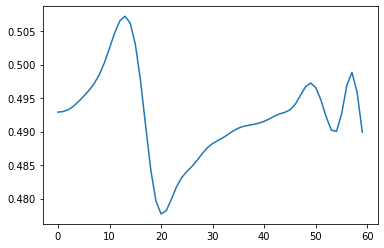

In [42]:
plt.plot(train_data[0])

In [43]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()

    self.encoder = tf.keras.Sequential([
      layers.Dense(60, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu"),
      layers.Dense(4, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(60, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()


In [44]:
autoencoder.compile(optimizer='adam', loss='mae')

In [45]:
history = autoencoder.fit(train_data, train_data, 
          epochs=500, 
          batch_size=64,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/500
8/8 [==============================] - 1s 11ms/step - loss: 0.0122 - val_loss: 0.0125
Epoch 2/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.0117
Epoch 3/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0114
Epoch 4/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.0112
Epoch 5/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0112
Epoch 6/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0112
Epoch 7/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0112
Epoch 8/500
1/8 [==>...........................] - ETA: 0s - loss: 0.0089

2022-11-23 04:07:06.468187: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


8/8 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.0112
Epoch 9/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0112
Epoch 10/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0112
Epoch 11/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0112
Epoch 12/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.0112
Epoch 13/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0112
Epoch 14/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.0112
Epoch 15/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.0112
Epoch 16/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0112
Epoch 17/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0112
Epoch 18/500
8/8 [================

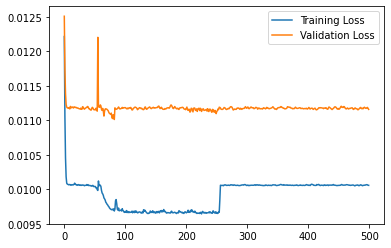

In [46]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [47]:
encoded_imgs = autoencoder.encoder(train_data[:2]).numpy()
# noral_test_data : latent vector
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

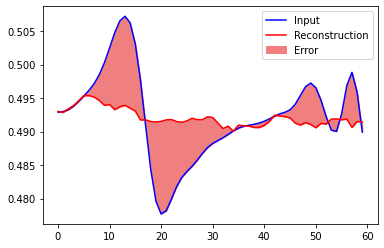

In [48]:
plt.plot(train_data[0], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[0], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[0], train_data[0], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [50]:
encoded_imgs = autoencoder.encoder(test_data).numpy()
# noral_test_data : latent vector
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

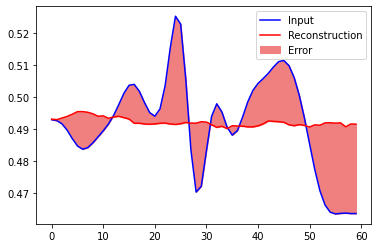

In [51]:
plt.plot(test_data[0], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[0], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[0], test_data[0], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

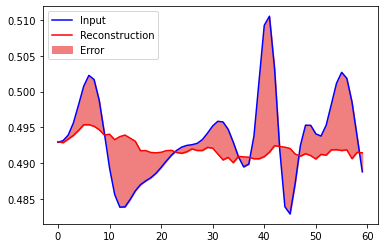

In [52]:
plt.plot(test_data[1], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[1], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[1], test_data[1], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

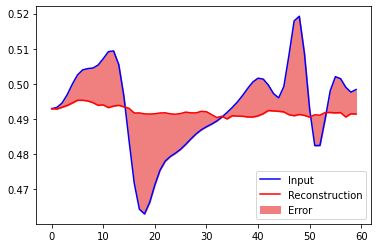

In [53]:
plt.plot(test_data[2], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[2], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[2], test_data[2], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

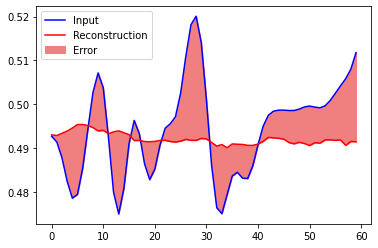

In [54]:
plt.plot(test_data[33], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[33], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[33], test_data[33], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

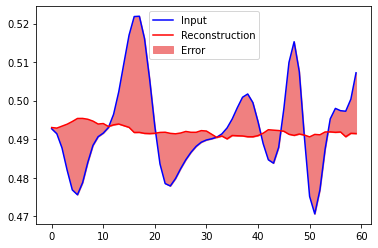

In [55]:
plt.plot(test_data[50], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[50], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[50], test_data[50], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [56]:
encoded_imgs = autoencoder.encoder(test_ano).numpy()
# noral_test_data를 encoder에 입력 : latent vector
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

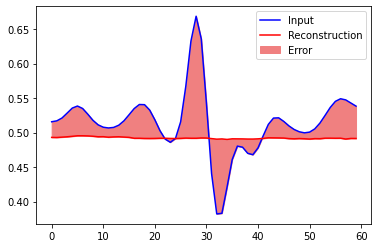

In [57]:
plt.plot(test_ano[2], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[2], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[2], test_ano[2], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

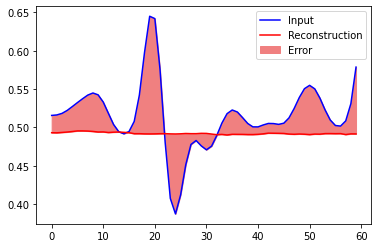

In [58]:
plt.plot(test_ano[3], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[3], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[3], test_ano[3], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

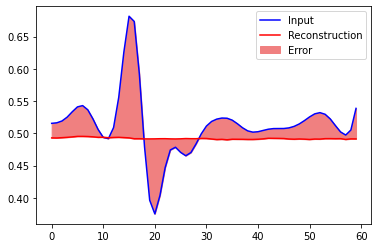

In [59]:
plt.plot(test_ano[4], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[4], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[4], test_ano[4], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

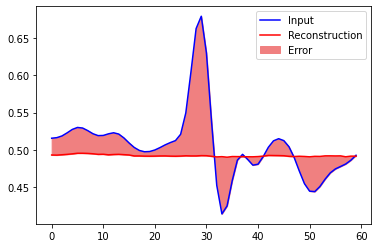

In [60]:
plt.plot(test_ano[44], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[44], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[44], test_ano[44], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

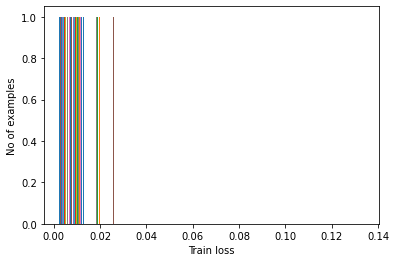

In [61]:
reconstructions = autoencoder.predict(test_data)
test_loss = tf.keras.losses.mae(reconstructions, test_data)
# 정상데이터와 복원한 데이터의 mae

plt.hist(test_loss)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [62]:
threshold = np.mean(test_loss) + 2.4 * np.std(test_loss)
print("Threshold: ", threshold)

Threshold:  0.0463156308978796


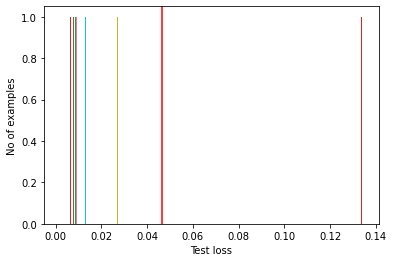

In [63]:
plt.hist(test_loss, bins=30)
plt.xlabel('Test loss')
plt.ylabel('No of examples')
plt.axvline(x=threshold, ymin=0.0, ymax=80, c='red')

plt.show()


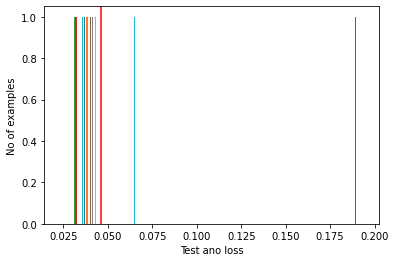

In [64]:
reconstructions_ano = autoencoder.predict(test_ano)
# 비정상 데이터
test_loss_ano = tf.keras.losses.mae(reconstructions_ano, test_ano)
# 비정상 데이터와 그 복원 데이터의 mae

plt.hist(test_loss_ano, bins=30)
plt.xlabel('Test ano loss')
plt.ylabel('No of examples')
plt.axvline(x=threshold, ymin=0.0, ymax=80, c='red')

plt.show()

* test

In [65]:
test_ano

<tf.Tensor: shape=(86, 60), dtype=float32, numpy=
array([[0.5119966 , 0.48752955, 0.41110027, ..., 0.6842421 , 0.6723209 ,
        0.6686239 ],
       [0.51543075, 0.5150022 , 0.513673  , ..., 0.50209194, 0.49816495,
        0.496208  ],
       [0.51568365, 0.5170154 , 0.5211035 , ..., 0.54737407, 0.542829  ,
        0.5383116 ],
       ...,
       [0.515515  , 0.51552576, 0.5148842 , ..., 0.49429336, 0.48555344,
        0.4786986 ],
       [0.5157679 , 0.5177497 , 0.52426624, ..., 0.5210844 , 0.49037308,
        0.46170118],
       [0.5141035 , 0.5051912 , 0.48077637, ..., 0.55319405, 0.5665404 ,
        0.576984  ]], dtype=float32)>

In [66]:
test_data

<tf.Tensor: shape=(113, 60), dtype=float32, numpy=
array([[0.4928545 , 0.4925567 , 0.4915597 , ..., 0.4636337 , 0.46348667,
        0.4634928 ],
       [0.49292433, 0.49314752, 0.49393037, ..., 0.49856737, 0.49370614,
        0.48879868],
       [0.4929476 , 0.49332702, 0.49455443, ..., 0.4990768 , 0.49766895,
        0.4984152 ],
       ...,
       [0.49304655, 0.49413788, 0.4976748 , ..., 0.48079592, 0.48129052,
        0.48199874],
       [0.49277887, 0.49198347, 0.48957327, ..., 0.50297904, 0.5090672 ,
        0.5178268 ],
       [0.49288943, 0.4928521 , 0.49274212, ..., 0.49379402, 0.4905156 ,
        0.48817432]], dtype=float32)>

In [67]:
test_concat = tf.concat([test_ano, test_data], 0)

In [68]:
test_concat_label = np.concatenate([labels_ano, test_labels], 0)

In [69]:
test_concat_label

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
      

In [70]:
def predict(model, data, threshold):
    # model, data, threshold input
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    # mae
    return tf.math.less(loss, threshold)
    #  loss < threshold : Normal

In [71]:
def print_stats(preds, labels):
    print('Accuracy = {}'.format(accuracy_score(labels, preds)))
    print('Precision = {}'.format(precision_score(labels, preds)))
    print('Recall = {}'.format(recall_score(labels, preds)))
    print('Confusion Matrix = {}'.format(confusion_matrix(labels, preds)))

In [72]:
reconstructions = autoencoder(test_concat)
loss = tf.keras.losses.mae(reconstructions, test_concat)

In [73]:
preds = predict(autoencoder, test_concat, threshold)

In [74]:
preds = preds.numpy()

In [75]:
def bi2num(x):
    if x == True:
        return 1
    else:
        return 0

In [76]:
preds_ans = []
for i in preds:
    preds_ans.append(bi2num(i))

In [77]:
test_concat_label_ans = []
for i in test_concat_label:
    test_concat_label_ans.append(bi2num(i))

In [78]:
print_stats(preds_ans, test_concat_label_ans)

Accuracy = 0.6432160804020101
Precision = 0.6166666666666667
Recall = 0.9823008849557522
Confusion Matrix = [[ 17  69]
 [  2 111]]


: 